# Tesco Grocery Purchase Analysis in Greater London Boroughs



In [26]:
#Essential packages for the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [27]:
#Loading the dataset
rawdata= pd.read_csv("C:/Users/Samhitha/Downloads/Tesco Datasets/year_borough_grocery.csv")
rawdata=pd.DataFrame(rawdata)
rawdata

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098
5,E09000006,319.336273,30.0,135.0,250.0,400.0,1000.0,347.979651,0.458224,101.105159,...,734232,325303.0,156274.0,169029.0,72176.0,196323.0,56804.0,39.853429,150.14,2166.664447
6,E09000007,348.420414,35.0,150.0,260.0,450.0,1000.0,370.640809,0.373270,102.525979,...,917661,243837.0,121808.0,122029.0,46242.0,169330.0,28265.0,35.934276,21.87,11149.382716
7,E09000008,353.636123,30.0,150.0,250.0,450.0,1000.0,425.267620,0.487412,107.461977,...,824237,380070.0,184305.0,195765.0,93166.0,237511.0,49393.0,36.896435,86.57,4390.319972
8,E09000009,358.569245,35.0,154.0,275.0,454.0,1000.0,373.797449,0.271506,106.197369,...,1824981,344285.0,172747.0,171538.0,81217.0,222669.0,40399.0,36.143460,55.55,6197.749775
9,E09000010,416.062456,40.0,180.0,325.0,500.0,1500.0,456.120381,0.187516,122.353062,...,3493012,328738.0,159756.0,168982.0,83274.0,203384.0,42080.0,36.190751,80.84,4066.526472


In [28]:
#Cleaning and Dropping nan values
rawdata = rawdata.dropna()


In [29]:
#Select the the important columns
selected_columns = ["f_beer", "f_dairy", "f_eggs", "f_fats_oils", "f_fish", "f_fruit_veg", "f_grains", 
    "f_meat_red", "f_poultry", "f_readymade", "f_sauces", "f_soft_drinks", "f_spirits", 
    "f_sweets", "f_tea_coffee", "f_water", "f_wine"]

# Filter the dataset to retain only the selected columns
data = rawdata[selected_columns]
data=pd.DataFrame(data)
data

,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine
0,0.026307,0.121101,0.011756,0.022851,0.021307,0.322872,0.122289,0.046465,0.018064,0.057108,0.011381,0.021961,0.003293,0.139697,0.004958,0.022606,0.025985
1,0.010783,0.096583,0.011266,0.031448,0.020717,0.248116,0.157618,0.051076,0.020254,0.061959,0.014344,0.037077,0.003822,0.179794,0.006770,0.039458,0.008913
2,0.011298,0.106467,0.012773,0.032430,0.024277,0.327326,0.132781,0.050390,0.020199,0.048065,0.014555,0.023797,0.003019,0.141607,0.006141,0.029242,0.015634
3,0.012231,0.095073,0.008948,0.025275,0.017349,0.251681,0.170318,0.046667,0.020140,0.080289,0.012818,0.031980,0.003100,0.172936,0.006770,0.031482,0.012945
4,0.010729,0.115018,0.012938,0.032990,0.020180,0.270670,0.157685,0.046171,0.020670,0.047499,0.013811,0.031545,0.003703,0.161408,0.005914,0.037473,0.011597
5,0.019327,0.096956,0.008775,0.023215,0.016209,0.247085,0.164548,0.042790,0.017570,0.077219,0.013160,0.035204,0.003032,0.179765,0.005713,0.028668,0.020766
6,0.016162,0.117740,0.012189,0.027497,0.023463,0.321332,0.130472,0.043330,0.018664,0.053354,0.012865,0.022920,0.002551,0.142966,0.005284,0.025420,0.023789
7,0.014641,0.099640,0.009745,0.025935,0.018104,0.247149,0.161678,0.044945,0.019698,0.068986,0.013652,0.039888,0.003607,0.172795,0.006453,0.037988,0.015095
8,0.014243,0.115131,0.012811,0.029560,0.022682,0.303364,0.142617,0.049917,0.019974,0.053913,0.014388,0.023124,0.003230,0.146897,0.006160,0.025098,0.016891
9,0.010893,0.105186,0.012326,0.033649,0.022679,0.265979,0.146914,0.060895,0.025171,0.054655,0.017791,0.028820,0.003316,0.160056,0.006200,0.031428,0.014043


## 1. Population Density Distribution

### Key Observations:
- The analysis of population density across various borough regions revealed that the majority of areas exhibit a density of **5,000-7,500 people per square kilometre**.
- Areas with **extremely high population density** were found to be less common.
- A plot of **population density (people per square kilometre)** against **area codes** highlighted:
  - **Bromley** as one of the least densely populated areas.
  - **Islington** as one of the most densely populated areas in Greater London.

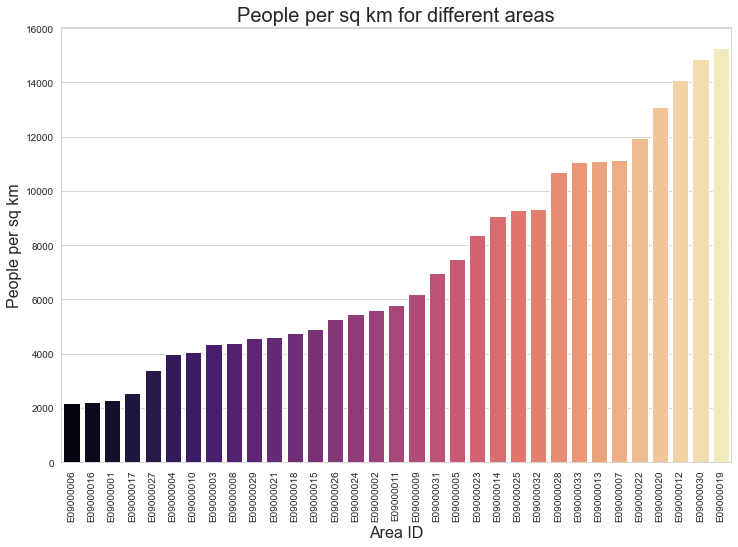

In [30]:
# Sort the DataFrame by 'People per sq km'
df_sorted = rawdata.sort_values('people_per_sq_km')

# Get the rows with the highest and lowest populations
highest_population = df_sorted.iloc[-1]
lowest_population = df_sorted.iloc[0]

#Plotting the data
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
bar_plot = sns.barplot(x='area_id', y='people_per_sq_km', data=df_sorted, palette='magma')

# Add labels to the x-axis and y-axis
plt.xlabel('Area ID', fontsize=16)
plt.ylabel('People per sq km', fontsize=16)

# Add a title to the plot
plt.title('People per sq km for different areas', fontsize=20)


plt.xticks(rotation=90)

# Show the plot
plt.show()

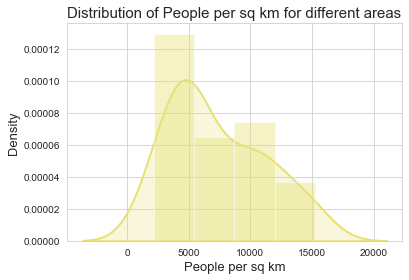

In [31]:
sns.distplot(rawdata['people_per_sq_km'], hist = True, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2})

plt.xlabel('People per sq km', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Distribution of People per sq km for different areas', fontsize=15)
plt.show()

## 2. Analysis of Food Purchase Trends

### Context:
Understanding the preferred food categories is critical for analyzing grocery purchase data. However, due to the lack of individual-level data, this analysis was conducted at the **area level**.

### Findings:
1. **Category-Level Preferences**:
   - A **higher proportion of fruits and vegetables** was consistently found in shopping carts across all areas.
   - A notably **lower proportion of spirits** was observed.

Column with Minimum Value: f_spirits, Minimum Value: 0.0024365046629438
Column with Maximum Value: f_fruit_veg, Maximum Value: 0.3332472064839918


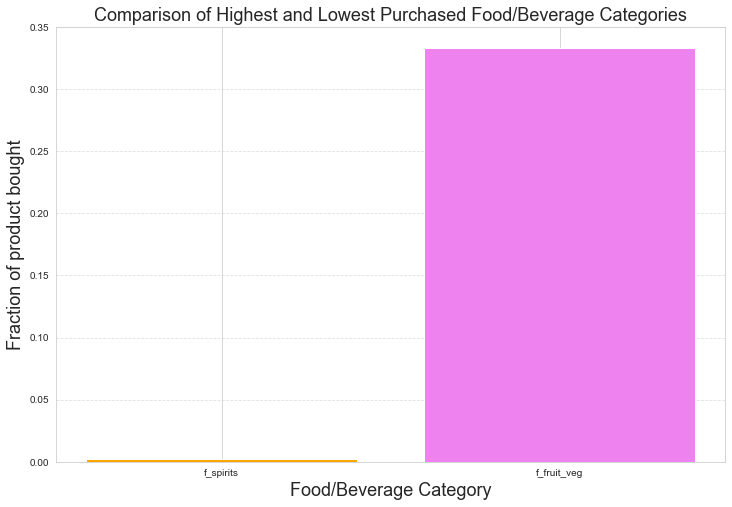

In [32]:

min_values = data.min()
max_values = data.max()

min_col = min_values.idxmin()
max_col = max_values.idxmax()

print(f"Column with Minimum Value: {min_col}, Minimum Value: {min_values[min_col]}")
print(f"Column with Maximum Value: {max_col}, Maximum Value: {max_values[max_col]}")

plt.figure(figsize=(12,8)) 

# Bar chart for min and max values
bars = plt.bar([min_col, max_col], [min_values[min_col], max_values[max_col]], color=['orange', 'violet'])

# Add value annotations
for bar in bars:
    yval = bar.get_height()
   

plt.title('Comparison of Highest and Lowest Purchased Food/Beverage Categories',fontsize=18)  
plt.xlabel('Food/Beverage Category',fontsize=18) 
plt.ylabel('Fraction of product bought',fontsize=18)  

plt.grid(True, axis='y', linestyle='--', alpha=0.6)  
plt.ylim([0,0.35])
plt.show()

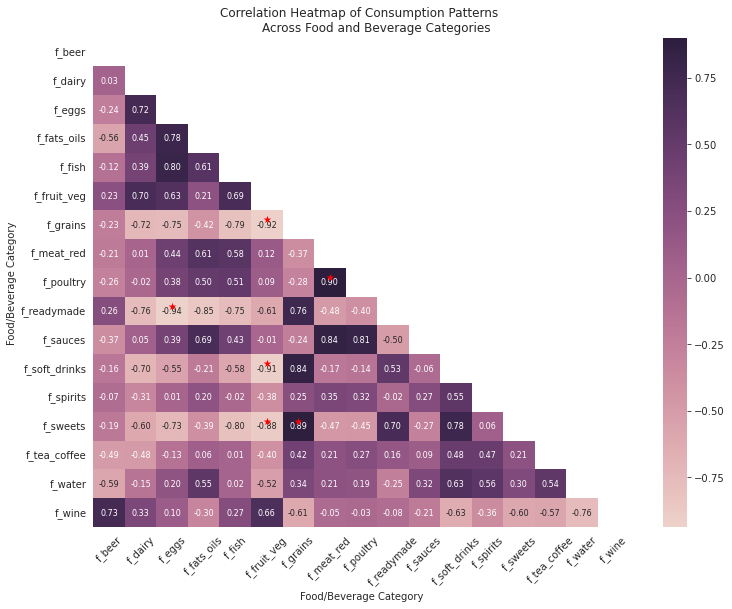

In [33]:
#Calculate correlation
correlation_matrix = data.corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
threshold = 0.85

# Create a mask for significant correlations
mask_significant = np.abs(correlation_matrix) > threshold

plt.figure(figsize=(12, 9))  
plt.rcParams['font.family'] = 'DejaVu Sans'

heatmap=sns.heatmap(correlation_matrix,
            mask=mask,  
            annot=True,
            annot_kws={"size": 8},
            fmt=".2f",  
            cmap=sns.cubehelix_palette(as_cmap=True))
# Highlight the significant correlations
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if mask_significant.iloc[i, j]:
            plt.text(i+0.5, j+0.5, '★', ha='center', va='bottom', color='red')

heatmap.set_xlabel('Food/Beverage Category')
heatmap.set_ylabel('Food/Beverage Category')

heatmap.set_title('''Correlation Heatmap of Consumption Patterns 
        Across Food and Beverage Categories''')
plt.xticks(rotation=45)  
plt.show()

2. **Correlations Between Food Categories**:
   - A **strong negative correlation** was identified between:
     - The proportion of **fruits and vegetables** with **grains**, **soft drinks**, and **sweets**.
   - A **negative correlation** was observed between **red meat** and **eggs**.
   - A **positive correlation** was identified between **red meat** and **poultry**.

### Other correlations 

In [34]:

correlation_coefficient = rawdata['population'].corr(rawdata['area_sq_km'])

print(f"The correlation coefficient between Population and 'area_sq_km' is {correlation_coefficient}")

The correlation coefficient between Population and 'area_sq_km' is 0.46578671368380814


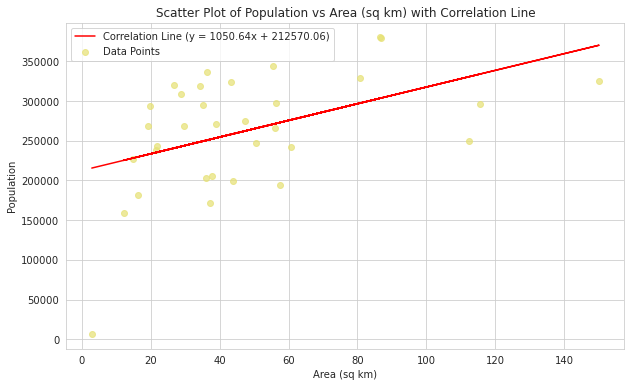

In [35]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rawdata['area_sq_km'], rawdata['population'], alpha=0.7, label='Data Points')

# Calculate the regression line 
x = rawdata['area_sq_km']
y = rawdata['population']
m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b, color='red', label=f'Correlation Line (y = {m:.2f}x + {b:.2f})')

# Add labels, title, and legend
plt.title('Scatter Plot of Population vs Area (sq km) with Correlation Line')
plt.xlabel('Area (sq km)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

## 3. Income Data Analysis

### Dataset Overview:
The income dataset includes information on annual **median, mean, and lower quartile earnings** by borough and UK region. The dataset is presented in both **nominal** and **real terms** and focuses on adult rates with uninterrupted pay for the survey period.

### Time Periods Analyzed:
- Income data for the years **2008**, **2009**, and **2015** were extracted for analysis.
- These years were chosen to compare **pre- and post-Great Recession** trends.

In [36]:
#Loading the dataset
rawdata2= pd.read_csv("C:/Users/Samhitha/Downloads/Tesco Datasets/year_borough_grocery.csv")
rawdata2=pd.DataFrame(rawdata2)
rawdata2


,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098
5,E09000006,319.336273,30.0,135.0,250.0,400.0,1000.0,347.979651,0.458224,101.105159,...,734232,325303.0,156274.0,169029.0,72176.0,196323.0,56804.0,39.853429,150.14,2166.664447
6,E09000007,348.420414,35.0,150.0,260.0,450.0,1000.0,370.640809,0.373270,102.525979,...,917661,243837.0,121808.0,122029.0,46242.0,169330.0,28265.0,35.934276,21.87,11149.382716
7,E09000008,353.636123,30.0,150.0,250.0,450.0,1000.0,425.267620,0.487412,107.461977,...,824237,380070.0,184305.0,195765.0,93166.0,237511.0,49393.0,36.896435,86.57,4390.319972
8,E09000009,358.569245,35.0,154.0,275.0,454.0,1000.0,373.797449,0.271506,106.197369,...,1824981,344285.0,172747.0,171538.0,81217.0,222669.0,40399.0,36.143460,55.55,6197.749775
9,E09000010,416.062456,40.0,180.0,325.0,500.0,1500.0,456.120381,0.187516,122.353062,...,3493012,328738.0,159756.0,168982.0,83274.0,203384.0,42080.0,36.190751,80.84,4066.526472


In [37]:
# Load the Excel file
xls = pd.ExcelFile('C:/Users/Samhitha/Downloads/earnings-workplace-borough.xls')

# Load a specific sheet by name
rawdata3 = xls.parse('FT workers annual Mean')
rawdata3=pd.DataFrame(rawdata3)
rawdata3



,Code,Area,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,48922,52203,62819,56450,64272,66628.0,74004.0,85886,...,83403.0,82808.0,77754.0,79489,80655.0,90028,88145,87817.0,93938,97149.0
2,E09000002,Barking and Dagenham,23620,24696,26050,26653,27792,29088.0,28728.0,28660,...,37214.0,36323.0,36705.0,37959,32093.0,32671,32086,35435.0,35632,32800.0
3,E09000003,Barnet,23128,25755,26068,30210,30518,30795.0,31652.0,30923,...,33766.0,34936.0,34730.0,35315,36818.0,36776,37319,38132.0,38136,39730.0
4,E09000004,Bexley,21386,22580,23559,23517,24723,24617.0,28162.0,28847,...,32463.0,31878.0,33367.0,32666,33857.0,34496,33993,36350.0,34710,39539.0
5,E09000005,Brent,20911,23726,24164,24071,29790,25416.0,27371.0,29712,...,34480.0,33484.0,34281.0,36579,35840.0,35830,36809,38287.0,36643,43241.0
6,E09000006,Bromley,21293,21178,19749,21513,25474,27617.0,29955.0,#,...,34133.0,33458.0,35238.0,35338,34354.0,35201,37559,39304.0,38560,38893.0
7,E09000007,Camden,30249,34864,40033,34486,38106,38595.0,39826.0,40593,...,45539.0,44629.0,45489.0,45644,44970.0,46502,49239,45999.0,46775,49898.0
8,E09000008,Croydon,22205,23440,23994,25815,26920,28816.0,28101.0,29842,...,35213.0,34769.0,34199.0,#,35839.0,36880,38522,37614.0,39135,41746.0
9,E09000009,Ealing,25046,26615,29516,29470,30117,31153.0,32106.0,32130,...,33210.0,32716.0,31980.0,34468,36039.0,36304,36488,37847.0,36335,36849.0


In [47]:
data2=rawdata3.iloc[0:34]
data2
#data2 = data2[~data2.apply(lambda row: row.astype(str).str.contains('#').any(), axis=1)]
first_column= data2.iloc[:,0]
selected_years = [2015,2008,2022,2007,2009,]
data3= data2[selected_years]
data4= pd.concat([data2.iloc[:,0], data3], axis=1)
data4= data4.dropna()
data4

,Code,2015,2008,2022,2007,2009
1,E09000001,77754.0,82973.0,97149.0,86778.0,80769.0
2,E09000002,36705.0,31795.0,32800.0,31994.0,33126.0
3,E09000003,34730.0,34468.0,39730.0,33007.0,35013.0
4,E09000004,33367.0,31305.0,39539.0,30375.0,31988.0
5,E09000005,34281.0,29631.0,43241.0,28503.0,31033.0
6,E09000006,35238.0,33378.0,38893.0,35021.0,33329.0
7,E09000007,45489.0,42816.0,49898.0,40595.0,45633.0
8,E09000008,34199.0,31842.0,41746.0,29341.0,33826.0
9,E09000009,31980.0,35772.0,36849.0,34374.0,34873.0
10,E09000010,31041.0,28930.0,42402.0,28949.0,31584.0


In [48]:
data4 = data4.rename(columns={'Code': 'area_id'})
final_data = pd.merge(rawdata2, data4, on='area_id')
final_data

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,2015,2008,2022,2007,2009
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,4349.0,1320.0,43.910124,2.90,2305.862069,77754.0,82973.0,97149.0,86778.0,80769.0
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,123180.0,19640.0,33.017321,36.09,5627.625381,36705.0,31795.0,32800.0,31994.0,33126.0
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,237036.0,52988.0,37.195582,86.76,4365.813739,34730.0,34468.0,39730.0,33007.0,35013.0
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,146237.0,40122.0,38.880749,60.58,4001.105976,33367.0,31305.0,39539.0,30375.0,31988.0
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,211885.0,36525.0,35.766416,43.28,7473.267098,34281.0,29631.0,43241.0,28503.0,31033.0
5,E09000006,319.336273,30.0,135.0,250.0,400.0,1000.0,347.979651,0.458224,101.105159,...,196323.0,56804.0,39.853429,150.14,2166.664447,35238.0,33378.0,38893.0,35021.0,33329.0
6,E09000007,348.420414,35.0,150.0,260.0,450.0,1000.0,370.640809,0.373270,102.525979,...,169330.0,28265.0,35.934276,21.87,11149.382716,45489.0,42816.0,49898.0,40595.0,45633.0
7,E09000008,353.636123,30.0,150.0,250.0,450.0,1000.0,425.267620,0.487412,107.461977,...,237511.0,49393.0,36.896435,86.57,4390.319972,34199.0,31842.0,41746.0,29341.0,33826.0
8,E09000009,358.569245,35.0,154.0,275.0,454.0,1000.0,373.797449,0.271506,106.197369,...,222669.0,40399.0,36.143460,55.55,6197.749775,31980.0,35772.0,36849.0,34374.0,34873.0
9,E09000010,416.062456,40.0,180.0,325.0,500.0,1500.0,456.120381,0.187516,122.353062,...,203384.0,42080.0,36.190751,80.84,4066.526472,31041.0,28930.0,42402.0,28949.0,31584.0


### Key Insights:
#### 2015 Income Data:
- **No significant correlation** was observed between the **average income data of 2015** and the **buying patterns** of customers in borough regions.
- A slight **negative correlation** was noted between **average income** and **readymade food purchases**, but it was too low to draw conclusions.
- A **positive correlation (>0.3)** indicated that areas with **higher average income** tend to purchase more **fresh fruits and vegetables**, and vice versa.
  - This aligns with findings from a 2015 literature review, which stated:
    > "Low-income households in the UK, in the lowest ten percent, consumed an average of 3.3 portions of fruits and vegetables per day."

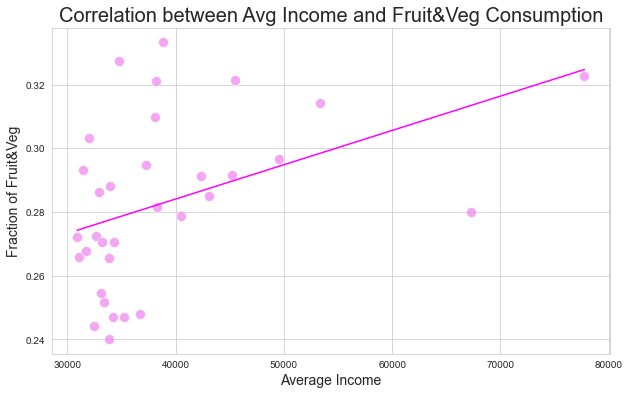

In [49]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=2015, y='f_fruit_veg', data=final_data,color='violet', s=100,alpha=0.7)
# Calculate the coefficients for the correlation line
coefficients = np.polyfit(final_data[2015], final_data['f_fruit_veg'], 1)
polynomial = np.poly1d(coefficients)

# Generate y values for the correlation line
ys = polynomial(final_data[2015])

# Plot the correlation line
sns.lineplot(x=final_data[2015], y=ys, color='magenta')
plt.title('Correlation between Avg Income and Fruit&Veg Consumption', fontsize=20)
plt.xlabel('Average Income', fontsize=14)
plt.ylabel('Fraction of Fruit&Veg', fontsize=14)
plt.show()

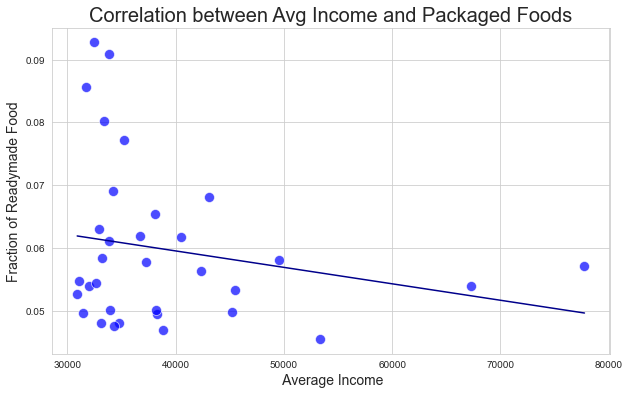

In [50]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=2015, y='f_readymade', data=final_data,color='blue', s=100,alpha=0.7)
# Calculate the coefficients for the correlation line
coefficients = np.polyfit(final_data[2015], final_data['f_readymade'], 1)
polynomial = np.poly1d(coefficients)


ys = polynomial(final_data[2015])

# Plot the correlation line
sns.lineplot(x=final_data[2015], y=ys, color='darkblue')
plt.title('Correlation between Avg Income and Packaged Foods', fontsize=20)
plt.xlabel(' Average Income', fontsize=14)
plt.ylabel('Fraction of Readymade Food', fontsize=14)
plt.show()

#### Income Trends During and After the Great Recession:
- The 2008 and 2009 data were analyzed to understand income trends during the **Great Recession** compared to 2015.
- **Literature findings** noted:
  - By 2015, **unemployment rates** had returned to pre-downturn levels.
  - There was an **increase in the UK's average income**.

#### Borough-Level Trends:
- Income data plotted for borough regions revealed:
  - A **slight increase** in income from **2008**, followed by a **decrease** between **2009 and 2015**.
  - Notable boroughs experiencing significant drops in income during the recession years:
    - **Enfield**
    - **Haringey**
    - **Hackney**
  - These findings align with broader literature on recession impacts.


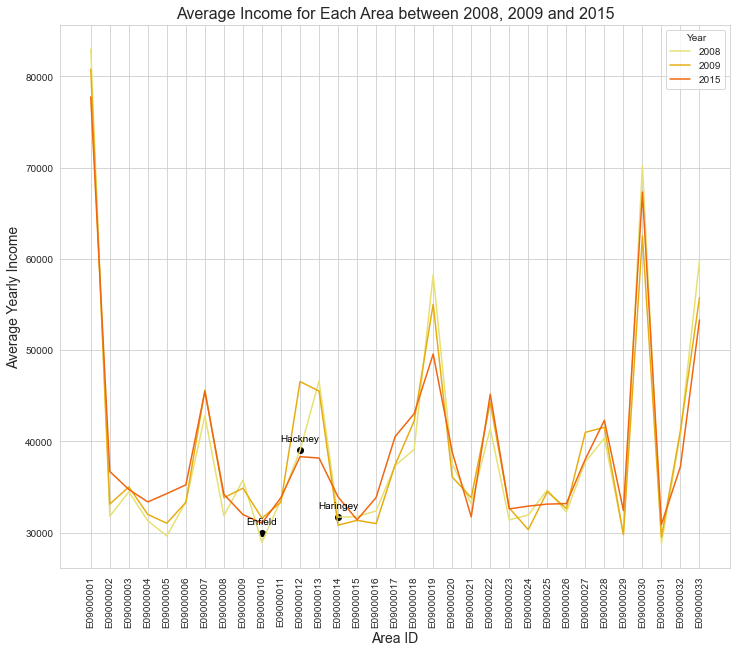

In [51]:
#Plotting data
sns.set_style("whitegrid")
sns.set_palette("CMRmap_r")

# Create the line plot
plt.figure(figsize=(12, 10))
for year in [2008, 2009, 2015]:
    sns.lineplot(x="area_id", y=year, data=final_data, label=str(year))

# Add title and labels
plt.title("Average Income for Each Area between 2008, 2009 and 2015", fontsize=16)
plt.xlabel("Area ID", fontsize=14)
plt.ylabel("Average Yearly Income", fontsize=14)

# Required points are highlighted 
important_points = [("E09000010", 2008, 29930, "Enfield"), ("E09000014", 2009, 31703, "Haringey"), ("E09000012", 2015, 39016, "Hackney")]
for point in important_points:
    area, year, income, name = point
    plt.scatter(area, income, color="black")
    plt.text(area, income+800, name, fontsize=10, ha='center', va='bottom', color='black')

plt.legend(title="Year")
plt.xticks(rotation=90)
plt.show()

In [43]:
y=[2008,2015]
final_data[y]
# Calculate total income for each year
total_income_2009= final_data[2009].sum()
total_income_2015 = final_data[2015].sum()
total_income_2008= final_data[2008].sum()



In [44]:
total_income_2009

1234381.0

In [45]:
total_income_2008

1223055.0

In [46]:
total_income_2015

1233317.0

## Conclusion

This analysis of population density, food purchase patterns, and income data provides insights into the socio-economic and consumer behavior trends across Greater London boroughs. Key takeaways include:
- A consistent preference for fruits and vegetables in grocery purchases.
- The correlation between income levels and food category preferences.
- The impact of the Great Recession on income trends in specific boroughs.

Further research could explore individual-level data and additional years to deepen the understanding of these trends.